# Test Of Tobias Reading "The deadliest virus in modern history..."

In [216]:
from idt_algo import IDT
from ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [217]:
gaze = pd.read_csv("C:/Users/s224182/Desktop/Fagpakkeprojekt-Eyes-Modelling/data/gaze_data71.csv")

In [218]:
warnings.filterwarnings('ignore') 
t = gaze['device_time_stamp']
start = t[0]
for i in range(len(t)):
    t[i] = (t[i] - start)/(467000*2)
t

0        0.000000
1        0.011888
2        0.023775
3        0.035663
4        0.047550
          ...    
4614    54.849912
4615    54.861801
4616    54.873688
4617    54.885576
4618    54.897464
Name: device_time_stamp, Length: 4619, dtype: float64

In [219]:
left_x = gaze['left_gaze_point_on_display_area_x']*2560
left_y = gaze['left_gaze_point_on_display_area_y']*1440
right_x = gaze['right_gaze_point_on_display_area_x']*2560
right_y = gaze['right_gaze_point_on_display_area_y']*1440

eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y})
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,918.651428,918.682632,1212.094202,1188.775806
1,0.011888,915.000381,915.423508,1214.562006,1194.057655
2,0.023775,915.569687,913.824387,1215.878563,1193.408089
3,0.035663,913.442612,919.133148,1212.388000,1198.080282
4,0.047550,918.301086,924.243927,1208.432236,1196.686649
...,...,...,...,...,...
4614,54.849912,1725.632935,1715.985107,1276.129217,1217.879276
4615,54.861801,1723.252258,1716.988983,1273.766041,1213.819485
4616,54.873688,1730.626678,1723.224640,1268.764601,1208.766632
4617,54.885576,1735.559082,1718.930817,1274.087219,1213.456593


In [220]:
eyes = eyes.dropna()

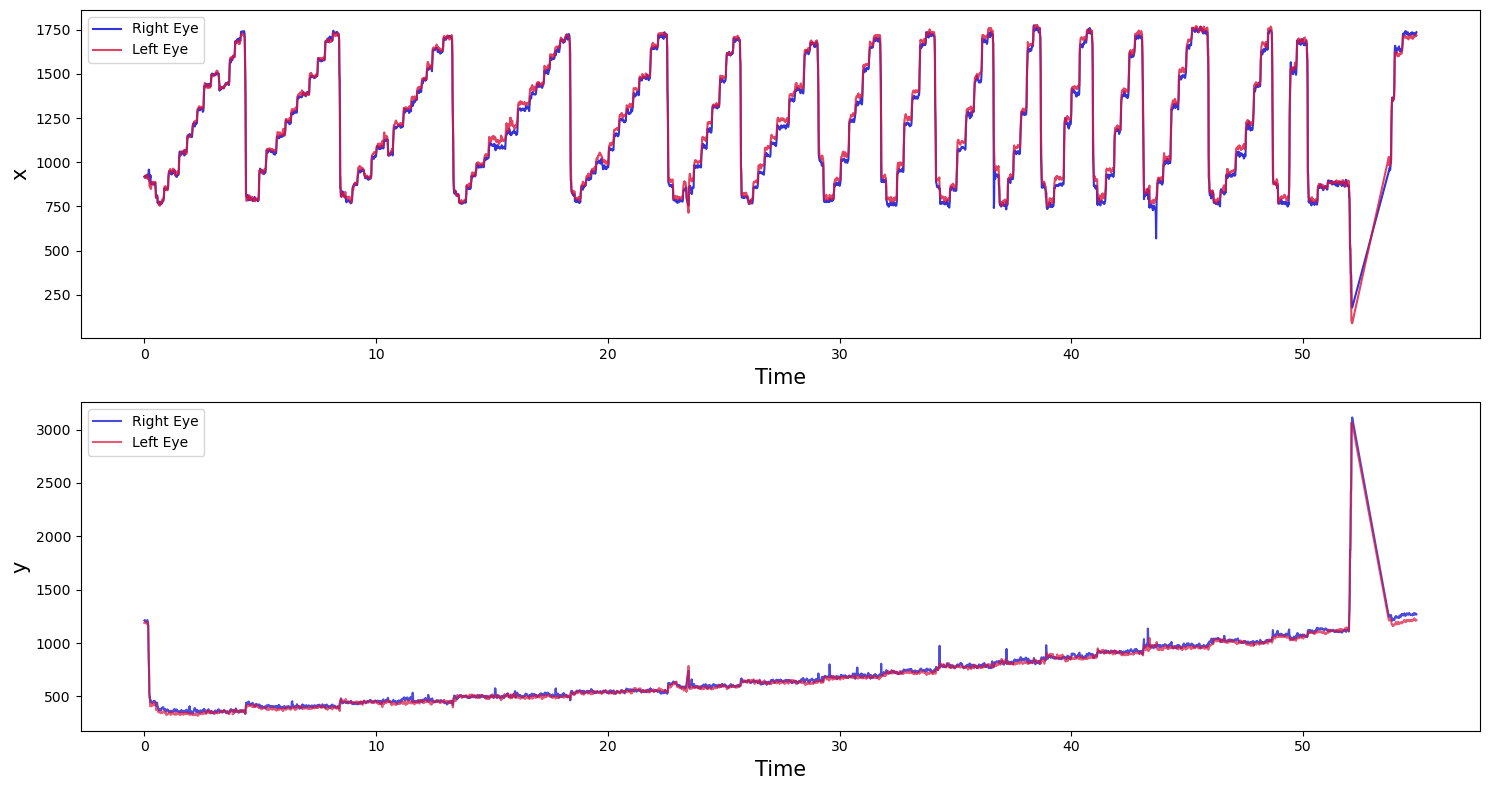

In [221]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [222]:
eyes_filtered = eyes[(eyes['t'] >= 2) & (eyes['t'] <= 10)]
eyes_filtered.reset_index(drop=True, inplace=True)

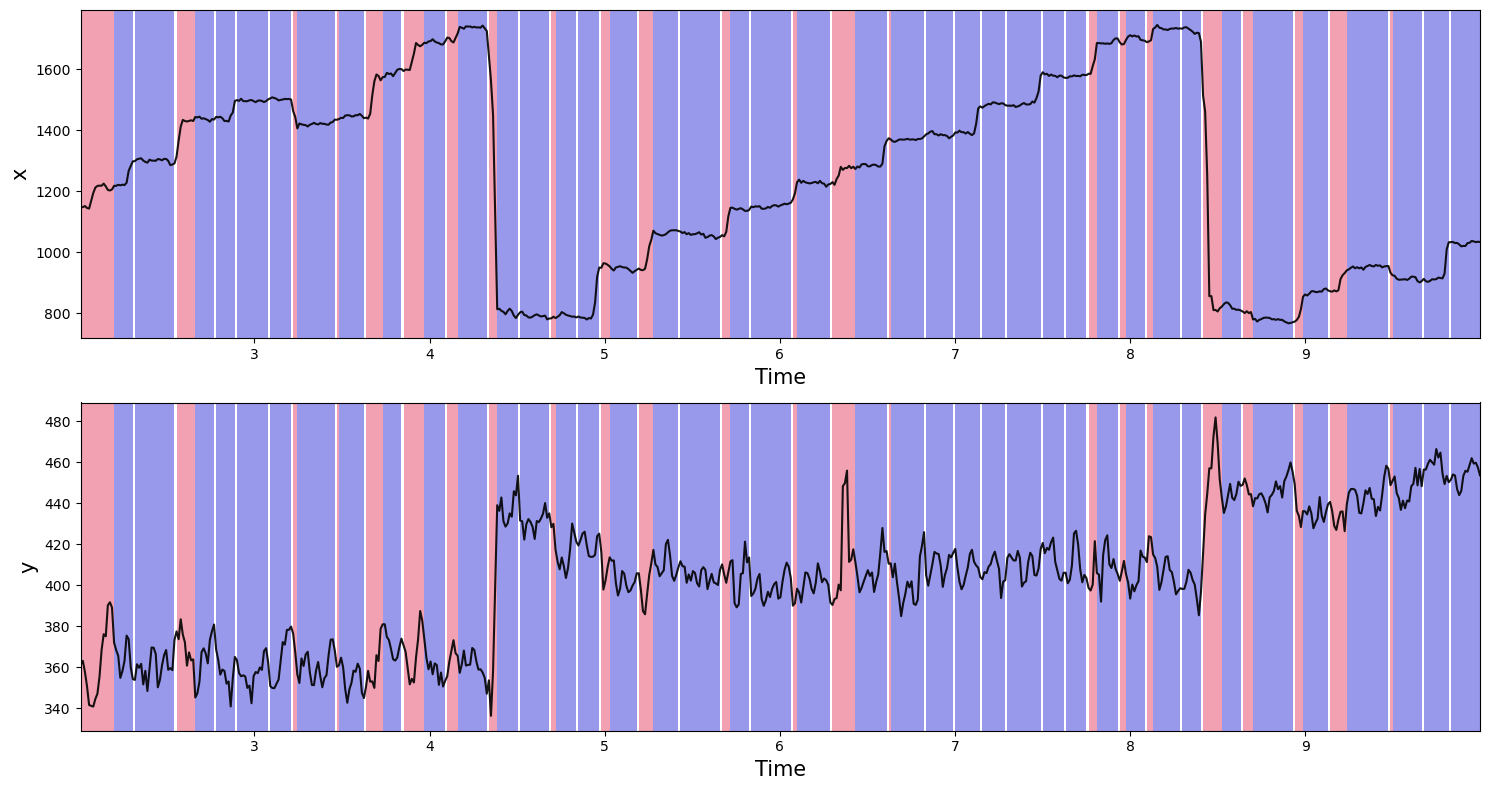

In [223]:
t = eyes_filtered['t']
x = eyes_filtered['x_right']
y = eyes_filtered['y_right']

classifier = IDT(t, x, y, threshold=36, window_size=7)
classifier.process()
classifier.plot()

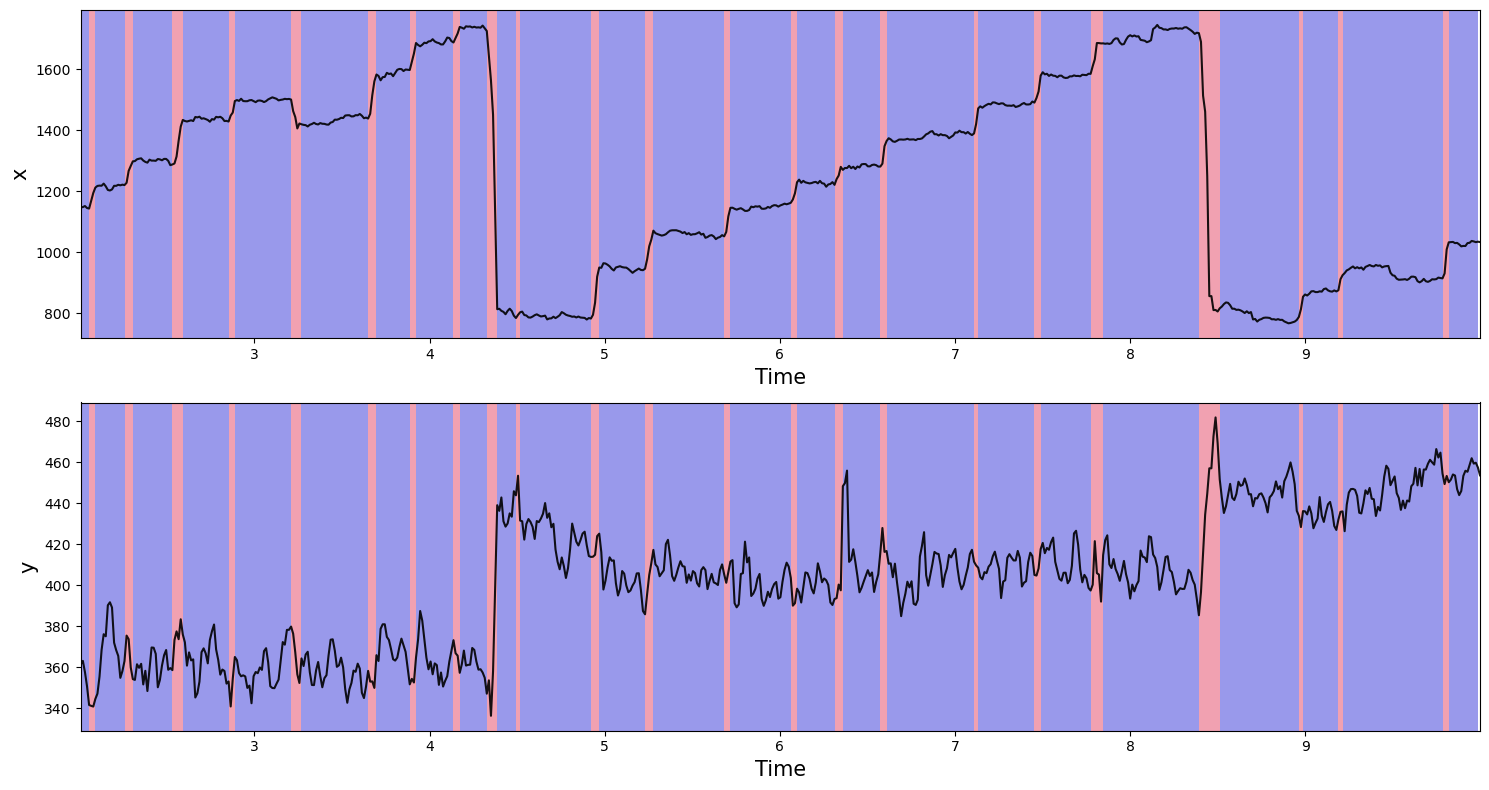

In [224]:
classifier = IHMM(t, x, y, threshold=1000, n_iter=19)
classifier.process()
classifier.plot()

In [225]:
classifier.stats()

Original probabilistic parameters: 
A = 
[[0.95 0.05]
 [0.05 0.95]]
B = 
[[0.9 0.1]
 [0.1 0.9]]

Re-estimated probabilistic parameters: 
A = 
[[0.92704147 0.07295853]
 [0.37865333 0.62134667]]
B = 
[[0.91951111 0.08048889]
 [0.15376439 0.84623561]]

Initial state distribution: 
P = [0.5 0.5]


In [226]:
eyes = eyes[(eyes['t'] >= 2) & (eyes['t'] <=50)]
eyes.reset_index(drop=True, inplace=True)
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

IHMM parameters re-estimation failed! Returning to original parameters.



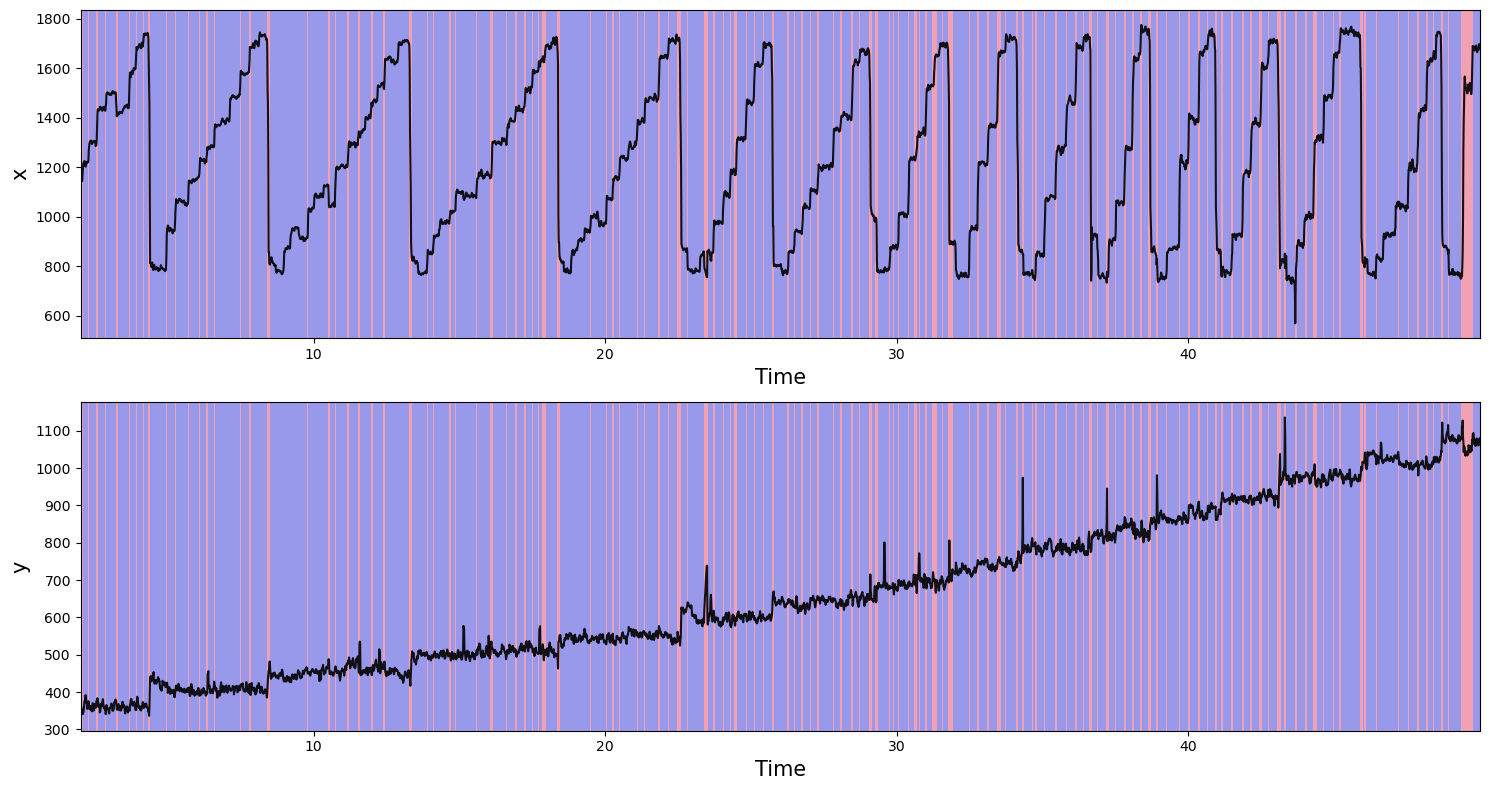

In [227]:
classifier = IHMM(t, x, y, threshold=1000, n_iter=19)
classifier.process()
classifier.plot()

In [228]:
classifier.stats()

Original probabilistic parameters: 
A = 
[[0.95 0.05]
 [0.05 0.95]]
B = 
[[0.9 0.1]
 [0.1 0.9]]

Re-estimated probabilistic parameters: 
A = 
[[0.95 0.05]
 [0.05 0.95]]
B = 
[[0.9 0.1]
 [0.1 0.9]]

Initial state distribution: 
P = [0.5 0.5]


In [229]:
fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
eyes = eyes.merge(fix, left_index=True, right_index=True)


In [234]:
counter = 0
si = 0
xpoints = []
ypoints = []
for i in range(len(eyes)):
    if eyes['t'][i] > 2 and eyes['t'][i] < 50:
        if eyes['fixations'][i] == 1:
            counter += 1
        if eyes['fixations'][i] == 0:
            si += 1
        elif eyes['fixations'][i] == 1 and counter > 5 and si > 3:
            xpoints.append(eyes['x_left'][i])
            ypoints.append(eyes['y_left'][i])
            counter = 0
            si = 0
   

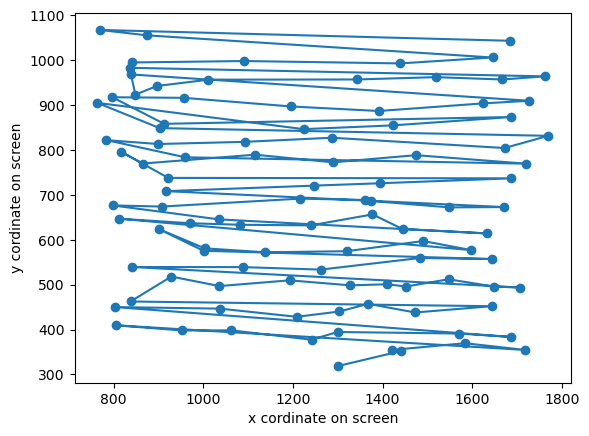

In [235]:
plt.plot(xpoints, ypoints, marker='o')
plt.xlabel("x cordinate on screen")
plt.ylabel("y cordinate on screen")
plt.show()
